# Covid-19 Detection 
We all are aware of the pandemic situation created by the outbreak of novel corona virus and the large of number of deaths it has caused worldwide.So, it is the need of the hour to develop a deeo learning model which can help us identify covid patients.

## Importing the Dataset 
The dataset contains the spectogram of cough sounds of normal and covid patients

In [1]:
# This will load the dataset.You will see a folder called ALL in your workspace.
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/CovidDetec.zip"
!unzip -qo CovidDetec.zip 
!rm CovidDetec.zip

--2020-12-17 07:28:12--  https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/CovidDetec.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.62.120
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.62.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3479943 (3.3M) [application/x-zip-compressed]
Saving to: ‘CovidDetec.zip’

CovidDetec.zip      100%[===================>]   3.32M  --.-KB/s    in 0.02s   

2020-12-17 07:28:12 (134 MB/s) - ‘CovidDetec.zip’ saved [3479943/3479943]



#### The following code has been used to convert the audio files to spectograms.But you don't have to worry about this step as it has been already done for you.
<code>
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

data_dir = 'CovidDetec/Covid'
audio_files = glob(data_dir + '/*.wav')
print(len(audio_files))
samples, sample_rate = librosa.load(audio_files[1],sr=44100)
sample = np.array(samples)
sample = sample.reshape(1,sample.shape[0])
for i in range (2,8):
    samples, sample_rate = librosa.load(audio_files[1],sr=44100)
    temp = np.array(samples)
    temp = temp.reshape(1,temp.shape[0])
    sample = np.append(sample, temp, axis=0)
    print(type(sample))
    print(sample.shape)
for i in range (1,8):
    fig = plt.figure(figsize=[4,4])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=sample[1], sr=sample_rate)
    #librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    direc = 'CovidDetec/MS/CovidMS/Covid10'+str(i)
    plt.savefig(direc)
</code>    

## Importing importnat libraries


In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

## Data Visualization

In [2]:
data_path = "CovidDetec/MS/"

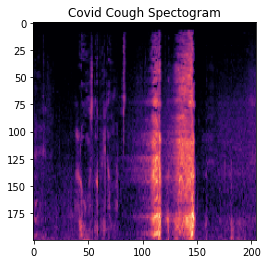

In [3]:
# Check images
img = cv2.imread("CovidDetec/MS/Train/Covid/Covid10.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title("Covid Cough Spectogram")
plt.imshow(img)

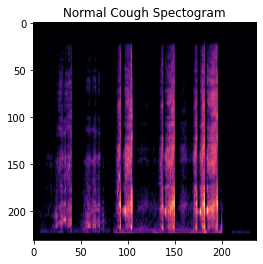

In [4]:
# Check images
img = cv2.imread("CovidDetec/MS/Train/Normal/Normal11.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title("Normal Cough Spectogram")
plt.imshow(img)

## Creating TrainSet and TestSet

In [5]:
# Data agumentation on train and test

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
# create dataset train
training_set = train_datagen.flow_from_directory(data_path + 'Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

Found 60 images belonging to 2 classes.


In [7]:
# Create test data set
test_set = test_datagen.flow_from_directory(data_path + 'Test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 10 images belonging to 2 classes.


## Model Architecture

In [8]:
# Model creation with changes

model = VGG16(input_shape=(224,224,3),include_top=False)

for layer in model.layers:
    layer.trainable = False

newModel = model.output
newModel = AveragePooling2D()(newModel)
newModel = Flatten()(newModel)
newModel = Dense(128, activation="relu")(newModel)
newModel = Dropout(0.5)(newModel)
newModel = Dense(2, activation='softmax')(newModel)

model = Model(inputs=model.input, outputs=newModel)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

## Model Training


In [9]:
opt=Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=8)

Epoch 1/8
4/4 [==============================] - 2s 456ms/step - loss: 0.7736 - accuracy: 0.5667 - val_loss: 0.6608 - val_accuracy: 0.6000
Epoch 2/8
4/4 [==============================] - 1s 145ms/step - loss: 0.6695 - accuracy: 0.6000 - val_loss: 0.6096 - val_accuracy: 0.8000
Epoch 3/8
4/4 [==============================] - 1s 131ms/step - loss: 0.5953 - accuracy: 0.6500 - val_loss: 0.5676 - val_accuracy: 0.8000
Epoch 4/8
4/4 [==============================] - 1s 129ms/step - loss: 0.5753 - accuracy: 0.6833 - val_loss: 0.5442 - val_accuracy: 0.7000
Epoch 5/8
4/4 [==============================] - 1s 127ms/step - loss: 0.4990 - accuracy: 0.7500 - val_loss: 0.5060 - val_accuracy: 0.8000
Epoch 6/8
4/4 [==============================] - 1s 130ms/step - loss: 0.4675 - accuracy: 0.8000 - val_loss: 0.4682 - val_accuracy: 0.9000
Epoch 7/8
4/4 [==============================] - 1s 128ms/step - loss: 0.4350 - accuracy: 0.8333 - val_loss: 0.4383 - val_accuracy: 1.0000
Epoch 8/8
4/4 [============

## Accessing the performance of the model

Text(0.5, 1.0, 'Training and Validation Accuracy')

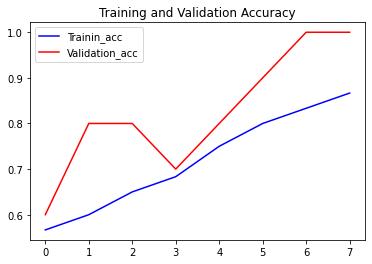

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

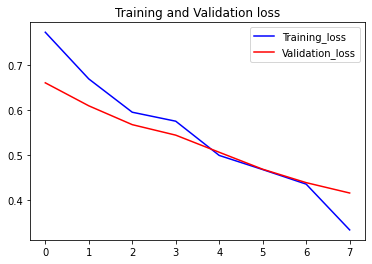

In [12]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

In [13]:
print("Accuracy of our model on test data : " , model.evaluate(test_set)[1]*100 , "%")

1/1 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 1.0000
Accuracy of our model on test data :  100.0 %


## Saving the model

In [14]:
model.save("CovidTest.h5")

## Compiling the DeepC Compiler

In [15]:
!deepCC CovidTest.h5

[INFO]
Reading [keras model] 'CovidTest.h5'
[SUCCESS]
Saved 'CovidTest.onnx'
[INFO]
Reading [onnx model] 'CovidTest.onnx'
[INFO]
Model info:
  ir_vesion : 5
  doc       : 
[WARNING]
[ONNX]: graph-node block1_conv1's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block1_conv2's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block2_conv1's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block2_conv2's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block3_conv1's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block3_conv2's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block3_conv3's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block4_conv1's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block4_conv2's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block4_conv3's a